# 概率函数

- **函数类别**
- d density 密度函数
- p distribution function 分布函数
- q quantile function 分位数函数
- r random 生成随机数

- **分布类别**
- Beta分布  beta
- 二项分布  binom
- 柯西分布  cauchy
- 非中心卡方分布  chisq
- 指数分布  exp
- F分布  f
- Gamma分布  gamma
- 几何分布  geom
- 超几何分布  hype
- 对数正态分布  lnorm
- Logistic分布  logis 
- 多项分布  multinom 
- 负二项分布  nbinom 
- 正态分布  norm 
- 泊松分布  pois 
- Wilcoxon符号秩分布  signrank 
- t分布  t 
- 均匀分布  unif 
- Weibull分布  weibull 
- Wilcoxon秩和分布  wilcox 

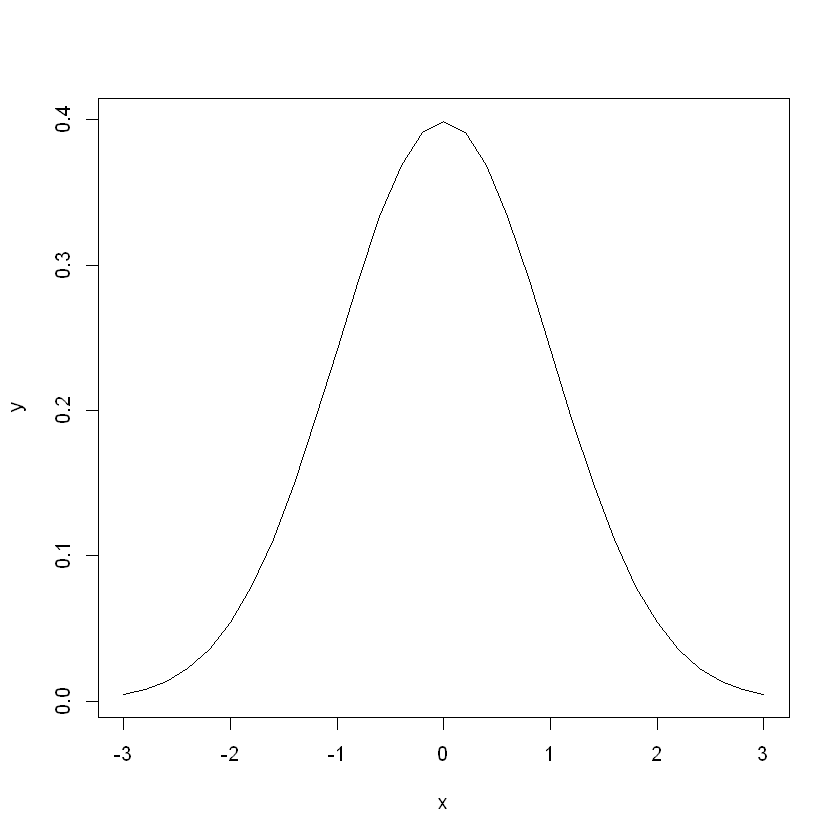

In [6]:
# 将-3,3 分割成30份
x <- pretty(c(-3,3), 30)
# 密度+正态
y <- dnorm(x)
plot(x,y,type="l")

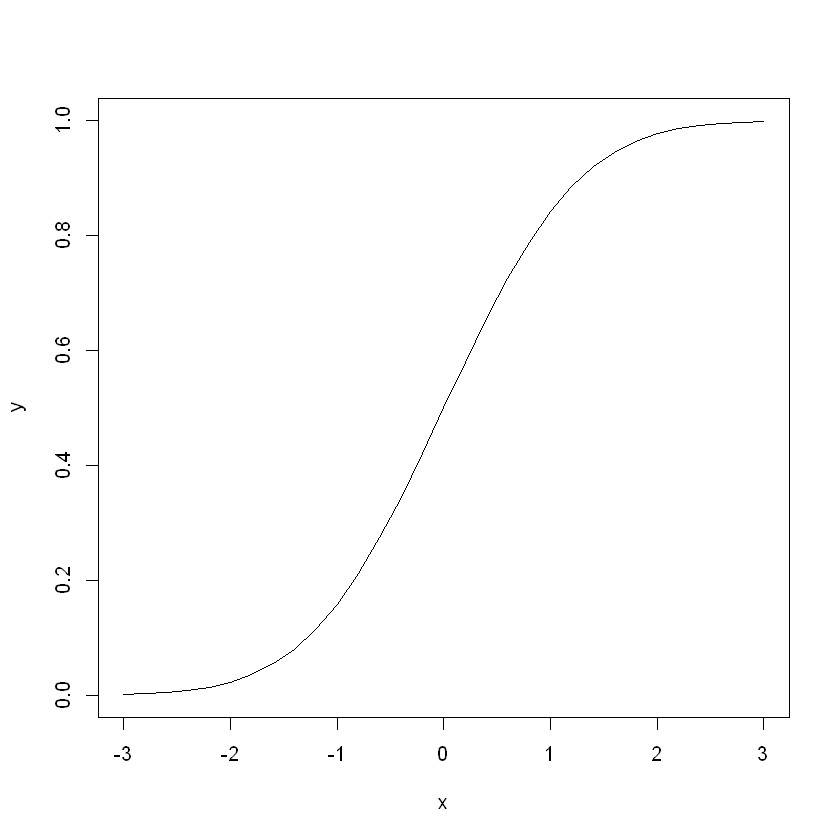

In [7]:
# 分布+正态
y <- pnorm(x)
plot(x,y,type="l")

In [8]:
# 分位数+正态
qnorm(.99,mean=0,sd=1)

[1] 2.326348

In [9]:
# 随机数+正态
x <- rnorm(50,mean=0,sd=1)
mean(x)

[1] -0.03436854

In [10]:
sd(x)

[1] 0.9820327

In [11]:
# set.seed()显式随机种子
runif(5)

[1] 0.3304309 0.7721635 0.5941189 0.3969554 0.5452263

In [12]:
runif(5)

[1] 0.4053387 0.3368393 0.2792347 0.4932406 0.5111012

In [13]:
set.seed(1024)
runif(5)

[1] 0.21808916 0.98763424 0.34846189 0.38104699 0.02098596

In [15]:
set.seed(1024)
runif(5)

[1] 0.218 0.988 0.348 0.381 0.021

In [17]:
# 生成多元正态数据 
library(MASS)
options(digits=3)
set.seed(1234)
mean <- c(230.7,146.7,3.6)
sigma <- matrix(c(15360,6721.2,-47.1,
                  6721.2,4700.9,-16.5,
                  -47.1,-16.5,0.3),nrow=3,ncol=3)
mydata <- mvrnorm(500,mean,sigma)
mydata <- as.data.frame(mydata)
names(mydata) <- c("y","x1","x2")
dim(mydata)

[1] 500   3

In [18]:
head(mydata,n=10)

y,x1,x2
98.8,41.3,3.43
244.5,205.2,3.80
375.7,186.7,2.51
-59.2,11.2,4.71
313.0,111.0,3.45
288.8,185.1,2.72
134.8,165.0,4.39
171.7,97.4,3.64
167.3,101.0,3.50
121.1,94.5,4.10


# 统计1

In [19]:
# 检验一个数据集的分布
attach(faithful)
summary(eruptions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.60    2.16    4.00    3.49    4.45    5.10 

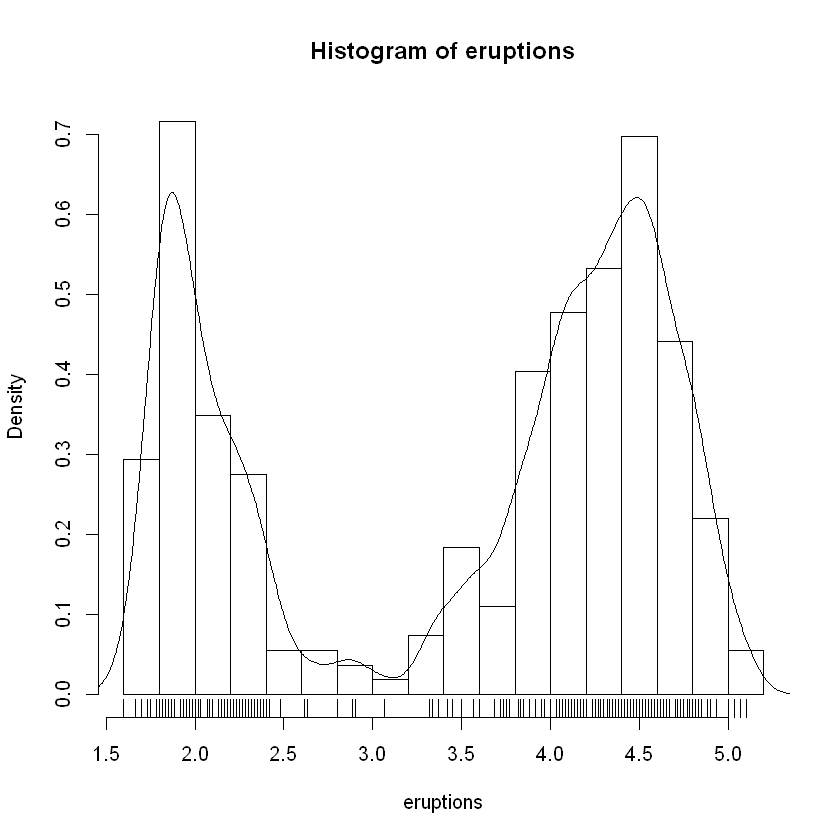

In [20]:
# 做密度图
hist(eruptions, seq(1.6, 5.2, 0.2), prob=TRUE)
lines(density(eruptions,bw=0.1))
rug(eruptions)

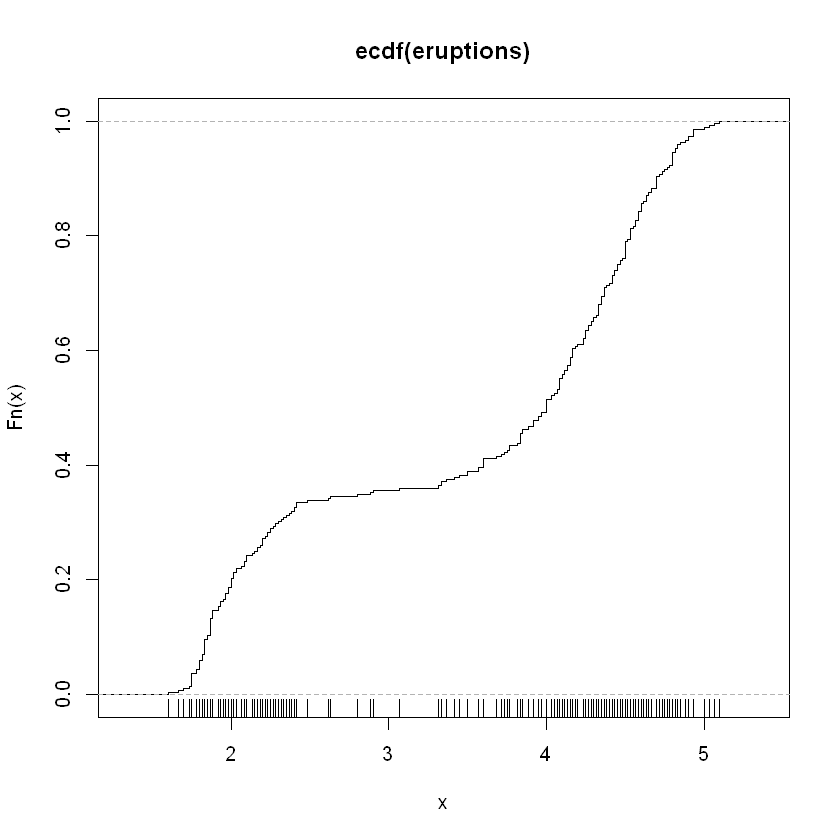

In [21]:
# 绘制经验累积分布函数
plot(ecdf(eruptions), do.points=FALSE, verticals=TRUE)
rug(eruptions)

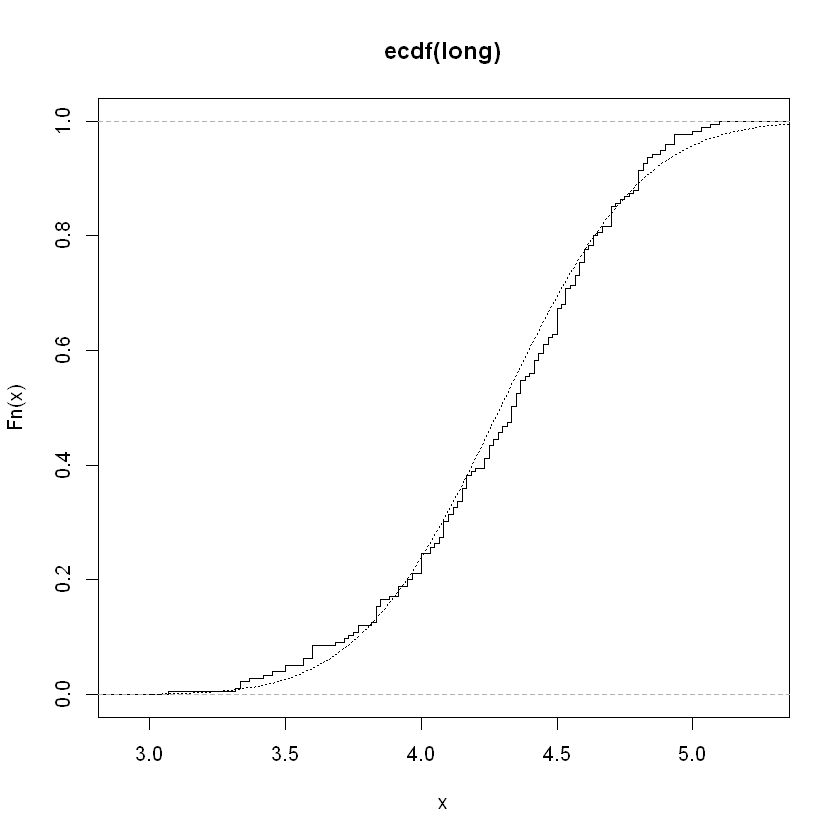

In [22]:
# 用正态分布拟合火山爆发三分钟后的情况
long <- eruptions[eruptions > 3]
plot(ecdf(long), do.points=FALSE, verticals=TRUE)
lines(seq(3, 5.4, 0.01),pnorm(seq(3, 5.4, 0.01),
                             mean=mean(long),sd=sd(long)),lty=3)

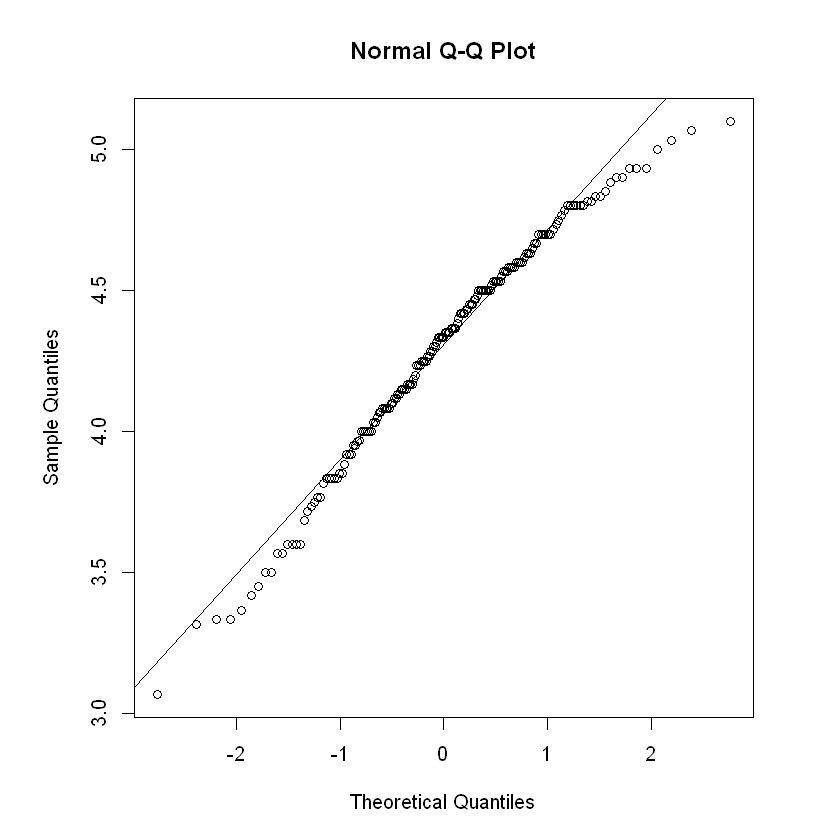

In [23]:
# QQplot,正态分布
par(pty="s") # 设置一个方形的图形区域
qqnorm(long); qqline(long)

In [24]:
# R提供了正规的正态性检验方法。R提供了 Shapiro-Wilk 检验
# 和 Kolmogorov-Smirnov 检验
shapiro.test(long)


	Shapiro-Wilk normality test

data:  long
W = 1, p-value = 0.01


In [25]:
ks.test(long, "pnorm", mean = mean(long), sd = sqrt(var(long)))

Warning message in ks.test(long, "pnorm", mean = mean(long), sd = sqrt(var(long))):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  long
D = 0.07, p-value = 0.4
alternative hypothesis: two-sided


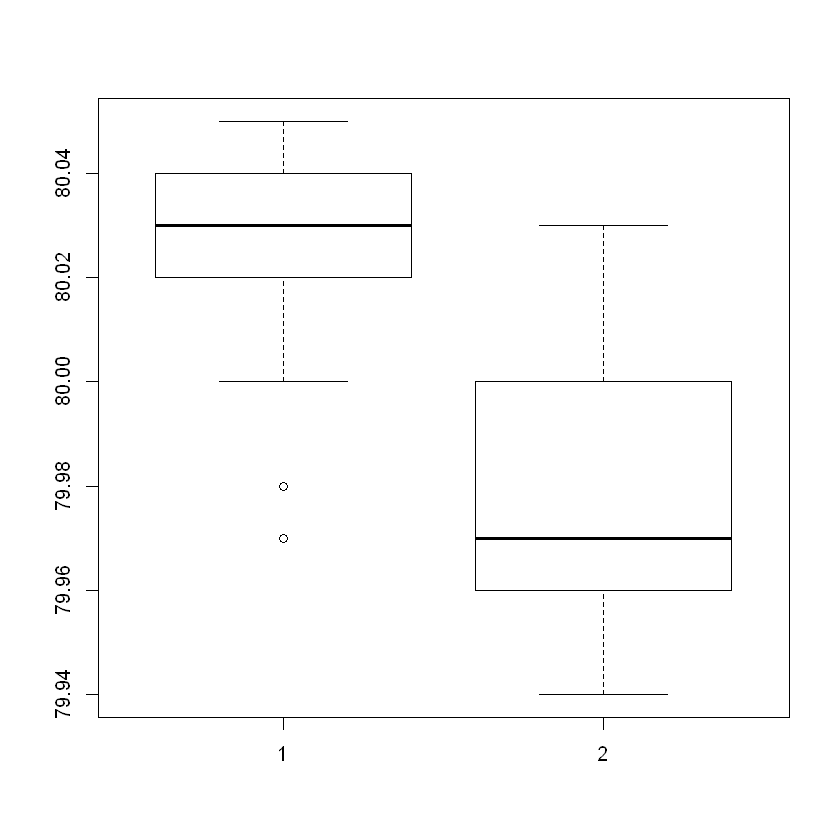

In [27]:
# 单样本和双样本检验 p59

A <- c(79.98,80.04,80.02,80.04,80.03,80.03,80.04,79.97,
       80.05,80.03,80.02,80.00,80.02)
B <- c(80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97)
boxplot(A, B)

In [28]:
# 非配对 t-检验
t.test(A,B)


	Welch Two Sample t-test

data:  A and B
t = 3, df = 10, p-value = 0.007
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0139 0.0702
sample estimates:
mean of x mean of y 
       80        80 


In [30]:
# F检验来确定方差的齐性情况
var.test(A, B)


	F test to compare two variances

data:  A and B
F = 0.6, num df = 10, denom df = 7, p-value = 0.4
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.125 2.105
sample estimates:
ratio of variances 
             0.584 


In [31]:
# 传统的假设方差齐性的t-检验
t.test(A, B, var.equal=TRUE)


	Two Sample t-test

data:  A and B
t = 3, df = 20, p-value = 0.003
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0167 0.0673
sample estimates:
mean of x mean of y 
       80        80 


In [32]:
# 双样本的Wilcoxon (或者Mann-Whitney)检验
wilcox.test(A, B)

Warning message in wilcox.test.default(A, B):
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  A and B
W = 90, p-value = 0.007
alternative hypothesis: true location shift is not equal to 0


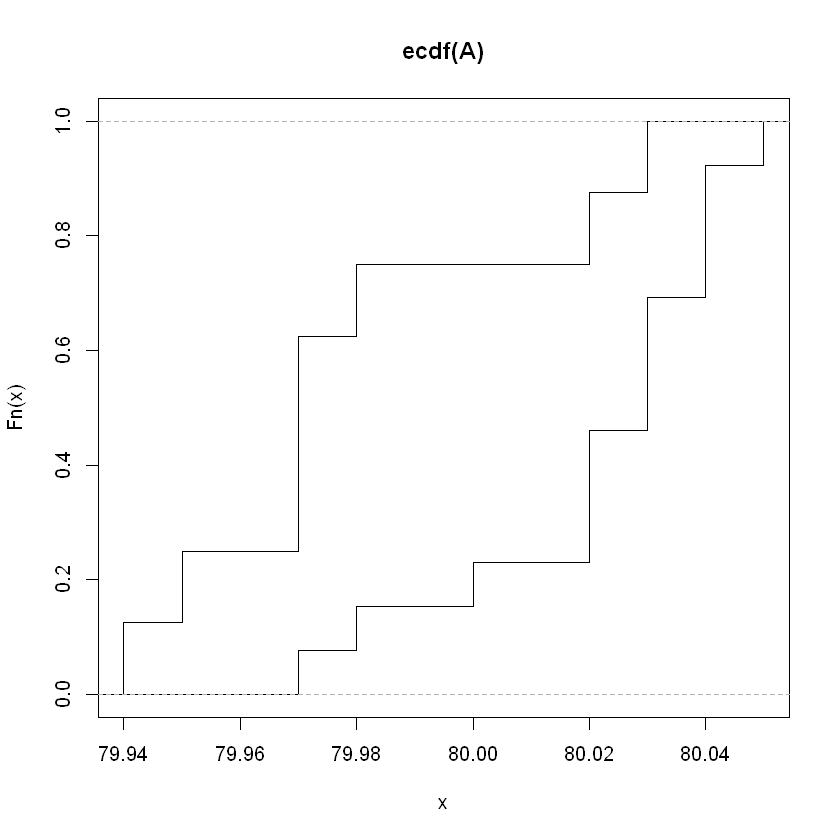

In [38]:
plot(ecdf(A), do.points=FALSE, verticals=TRUE, xlim=range(A, B))
plot(ecdf(B), do.points=FALSE, verticals=TRUE, add=TRUE)

In [39]:
# Kolmogorov-Smirnov 检验是对两个经验累计概率分布间的最大垂直距离进行统计
ks.test(A, B)

Warning message in ks.test(A, B):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  A and B
D = 0.6, p-value = 0.06
alternative hypothesis: two-sided


# 统计2

In [ ]:
# 操作符 ~ 用来定义 R 的模型公式（model formula）# 如何定义 略
# 默认模型公式 R导论p78

**方差分析和模型比较**

In [48]:
# 模型拟合函数aov(formula, data=data.frame) 
## 族
# 高斯,二项式,泊松,逆高斯,伽马
## 广义线性回归
#广义线性回归的函数是#glm(formula, family=family.generator, data=data.frame)

**非线性最小二乘法和最大似然法模型**

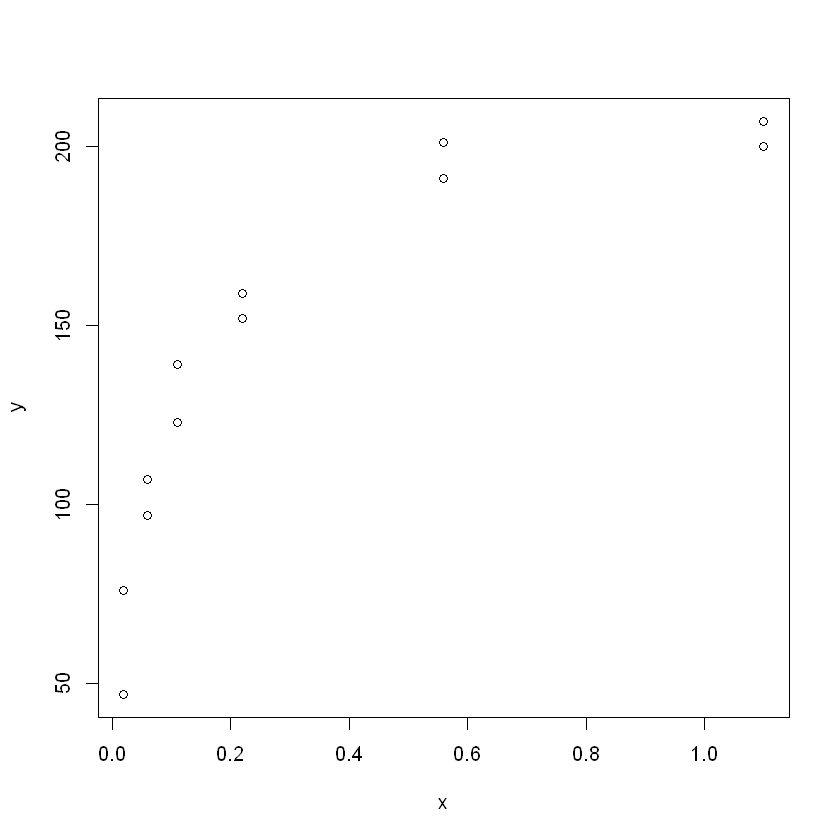

In [51]:
# R的非线性优化程序是optim()，nlm() 和nlminb()
# 非线性最小二乘法
# 数据与被拟合的模型
x <- c(0.02, 0.02, 0.06, 0.06, 0.11, 0.11, 0.22,       
       0.22, 0.56, 0.56,1.10, 1.10)
y <- c(76, 47, 97, 107, 123, 139, 159, 152, 191,       
       201, 207, 200)
fn <- function(p) sum((y-(p[1] * x)/(p[2] + x))^2)
# 画出数据
plot(x,y)

In [62]:
# 估计有些参数值并对比
xfit <- seq(.02, 1.1, .05)

In [63]:
yfit <- 200 * xfit/(0.1 + xfit)

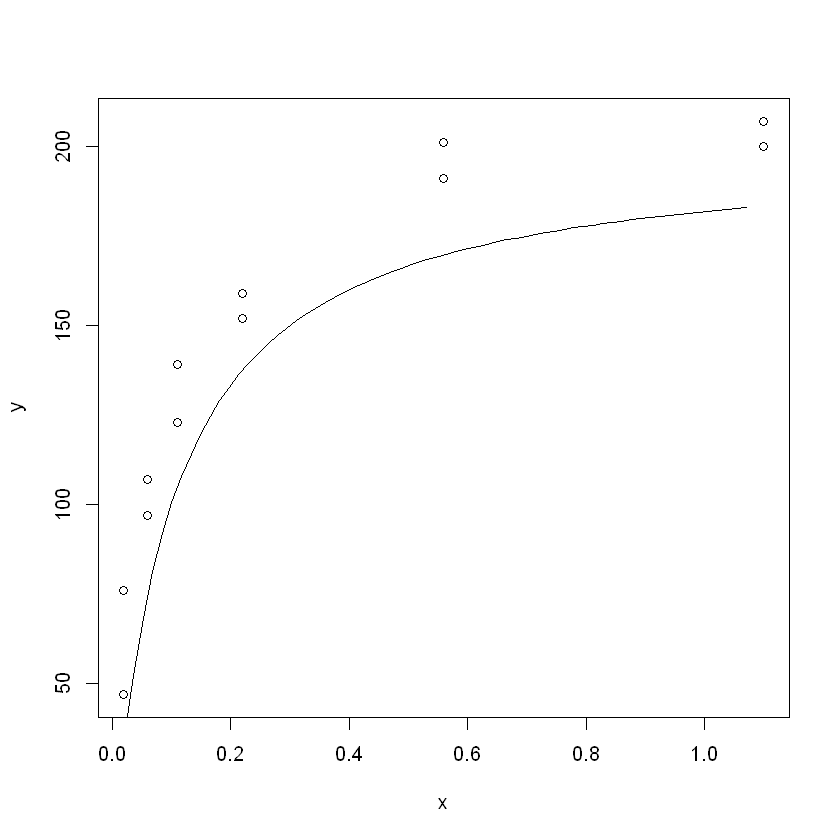

In [64]:
plot(x, y)
lines(spline(xfit,yfit))

In [56]:
# 做拟合
out <- nlm(fn, p = c(200, 0.1), hessian = TRUE)
# 误差的平方和 SSE
print(out$minimum)

[1] 1195


In [57]:
# 参数的最小二乘估计
print(out$estimate)

[1] 212.6838   0.0641


In [58]:
# 标准误 SE
sqrt(diag(2*out$minimum/(length(y) - 2) * solve(out$hessian)))

[1] 7.17347 0.00874

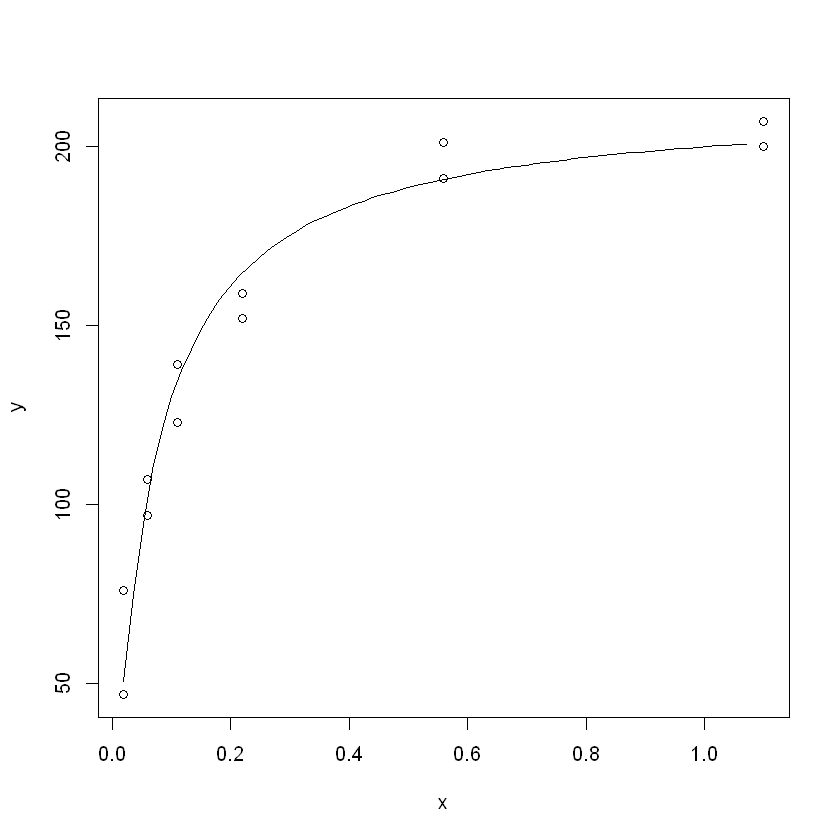

In [59]:
# 画出估计参数的拟合情况
plot(x, y)
xfit <- seq(.02, 1.1, .05)
yfit <- 212.68384222 * xfit/(0.06412146 + xfit)
lines(spline(xfit, yfit))

**最大似然法**